In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define a signal that we can apply convolution to
x = np.array([5.2, 5.3, 5.4, 5.1, 10.1, 10.3, 9.9, 10.3, 3.2, 3.4, 3.3, 3.1])

'보시면 아시겠지만 plt.show를 이용하면 Data point를 선으로 보간합니다.'

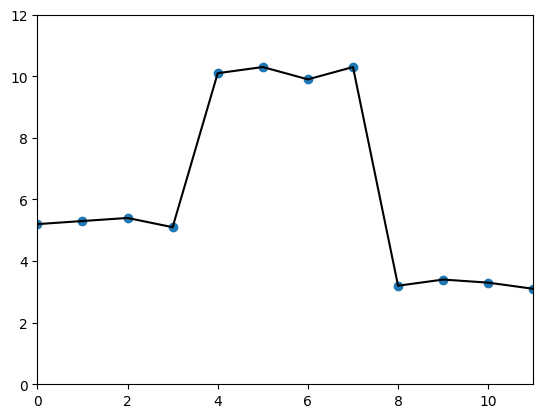

In [8]:
# Draw the signal
fig,ax = plt.subplots()
ax.plot(x, 'k-')
ax.set_xlim(0,11)
ax.set_ylim(0, 12)
# plt.show()

x2 = np.arange(0, 12, 1)
ax.scatter(x2, x)

"""
보시면 아시겠지만 plt.show를 이용하면 Data point를 선으로 보간합니다.
저는 산점도 그리기 ax.scatter를 이용해서 각 데이터 Point를 시각화했습니다.
"""


In [13]:
# Now let's define a zero-padded convolution operation
# with a convolution kernel size of 3, a stride of 1, and a dilation of 1
# as in figure 10.2a-c. Write it yourself, don't call a library routine!
# Don't forget that Python arrays are indexed from zero, not from 1 as in the book figures

### TODO : Zero-Padding
def conv_3_1_1_zp(x_in, omega):
    # Assuming omega is a 3x3 kernel
    kernel_size = 3
    stride = 1
    dilation = 1
    """보통 Zero-Padding Size는 (Kernel size-1)/2로 한다고 했죠?"""
    pad_width = (kernel_size - 1) // 2  # Padding on one side for zero padding

    # Pad the input array
    """
    np.pad를 이용하면 Zero padding을 쉽게 이용할 수 있습니다.

    Parameters are :
    (input matrix, Padding size, mode='constant', constant_values=0).
    Output of np.pad = Padded Matrix.
    """
    x_padded = np.pad(x_in, pad_width, mode='constant', constant_values=0)

    # Calculate output dimensions
    """
    Activation Map의 Dimension도 결정합니다.
    Padding에 의해 Input matrix의 Spatial Dimension이 보존됩니다.
    """

    h_out = len(x_in)  # 스트라이드가 1이므로 입력 크기와 출력 크기는 동일
    x_out = np.zeros(h_out)

    for i in range(h_out):
            x_out[i] = np.sum(x_padded[i:i+kernel_size] * omega)

    return x_out

    # h, w = x_in.shape
    # h_out = (h + 2 * pad_width - kernel_size) // stride + 1
    # w_out = (w + 2 * pad_width - kernel_size) // stride + 1

    # # Initialize the output array
    # x_out = np.zeros((h_out, w_out))

    # # Perform the convolution
    # """
    # 여기가 컨볼루션 연산이 수행되는 구간입니다
    # """
    # for i in range(h_out): # 행
    #     for j in range(w_out): # 열
    #         """2중 포문을 이용하면 됩니다."""
    #         # Define the current region of interest
    #         """
    #         Padding이 이루어진 input matrix에 Filter가 곱해 질 영역을 설정합니다.
    #         Row : i*stride ~ i*stride + kernel size
    #         Column : j*stride ~ j*stride + kernel size
    #         """
    #         region = x_padded[i*stride:i*stride+kernel_size, j*stride:j*stride+kernel_size]
    #         # Element-wise multiplication and sum
    #         x_out[i, j] = np.sum(region * omega)

    # return x_out

Sum of output is 71.1, should be 71.1


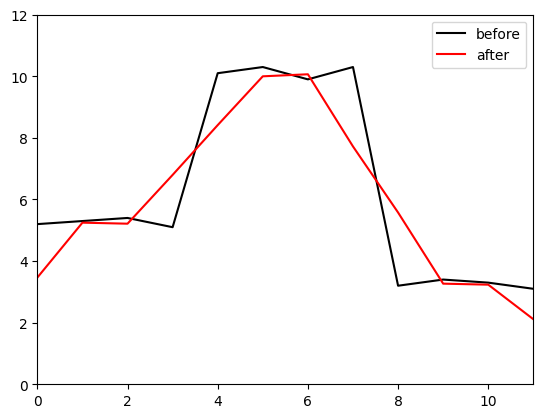

In [14]:
omega = np.array([0.33,0.33,0.33])

"""h=Activation Map After Convolution"""
h = conv_3_1_1_zp(x, omega)
# Check that you have computed this correctly
print(f"Sum of output is {np.sum(h):3.3}, should be 71.1")
# Draw the signal
fig,ax = plt.subplots()
ax.plot(x, 'k-',label='before')
ax.plot(h, 'r-',label='after')
ax.set_xlim(0,11)
ax.set_ylim(0, 12)
ax.legend()
plt.show()

"""Notice how the red function is a smoothed version of the black one
as it has averaged adjacent values.
The first and last outputs are considerably lower than the original curve though.
Make sure that you understand why!"""

"""
컨볼루션 연산 후에 원래 데이터 분포에 비해 Smooth해진 것을 확인할 수 있는데
이는 0.33이라는 가중치가 모든 데이터 Sample에 곱해졌기 때문이고
Zero Padding 후에 Input matrix의 외곽 지역에 0들이 있기 때문에
First and Last outputs are considerably lower than the original curve 인 것입니다.
"""

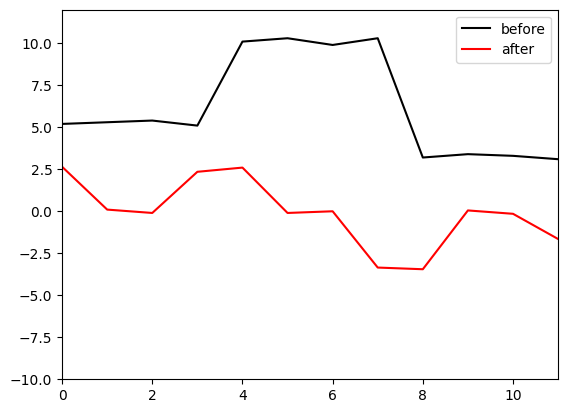

'Notice that the convolution has a peak \nwhere the original function went up and trough \nwhere it went down. \nIt is roughly zero where the function is locally flat. \nThis convolution approximates a derivative.'

In [16]:
omega = [-0.5,0,0.5]
h2 = conv_3_1_1_zp(x, omega)
# Draw the signal
fig,ax = plt.subplots()
ax.plot(x, 'k-',label='before')
ax.plot(h2, 'r-',label='after')
ax.set_xlim(0,11)
ax.set_ylim(-10, 12)
ax.legend()
plt.show()

"""Notice that the convolution has a peak
where the original function went up and trough
where it went down.
It is roughly zero where the function is locally flat.
This convolution approximates a derivative."""

In [17]:
# Now let's define a zero-padded convolution operation
# with a convolution kernel size of 3, a stride of 2, and a dilation of 1
# as in figure 10.3a-b. Write it yourself, don't call a library routine!
def conv_3_2_1_zp(x_in, omega):


  # TODO -- write this function # replace this line x_out = x_out return x_out
  # Assuming omega is a 3x3 kernel
  kernel_size = 3
  stride = 2
  dilation = 1
  """보통 Zero-Padding Size는 (Kernel size-1)/2로 한다고 했죠?"""
  pad_width = (kernel_size - 1) // 2  # Padding on one side for zero padding

  # Pad the input array
  """
  np.pad를 이용하면 Zero padding을 쉽게 이용할 수 있습니다.

  Parameters are :
  (input matrix, Padding size, mode='constant', constant_values=0).
  Output of np.pad = Padded Matrix.
  """
  x_padded = np.pad(x_in, pad_width, mode='constant', constant_values=0)

  # Calculate output dimensions
  """
  Activation Map의 Dimension도 결정합니다.
  Padding에 의해 Input matrix의 Spatial Dimension이 보존됩니다.
  """

  h_out = int(np.ceil(len(x_in)/2))  # 스트라이드가 1이므로 입력 크기와 출력 크기는 동일
  x_out = np.zeros(h_out)

  for i in range(h_out):
          x_out[i] = np.sum(x_padded[i:i+kernel_size] * omega)

  return x_out

In [18]:
omega = [0.33,0.33,0.33]
h3 = conv_3_2_1_zp(x, omega)
# If you have done this right, the output length should be six and it should
# contain every other value from the original convolution with stride 1
print(h)
print(h3) # Output should be six for stride 2 !

[ 3.465  5.247  5.214  6.798  8.415  9.999 10.065  7.722  5.577  3.267
  3.234  2.112]
[3.465 5.247 5.214 6.798 8.415 9.999]


In [22]:
# Now let's define a zero-padded convolution operation
# with a convolution kernel size of 5, a stride of 1, and a dilation of 1
# as in figure 10.3c. Write it yourself, don't call a library routine!
def conv_5_1_1_zp(x_in, omega):
  # TODO -- write this function
  # replace this line

  # TODO -- write this function # replace this line x_out = x_out return x_out
  # Assuming omega is a 3x3 kernel
  kernel_size = 5
  stride = 5
  dilation = 1
  """보통 Zero-Padding Size는 (Kernel size-1)/2로 한다고 했죠?"""
  pad_width = (kernel_size - 1) // 2  # Padding on one side for zero padding

  # Pad the input array
  """
  np.pad를 이용하면 Zero padding을 쉽게 이용할 수 있습니다.

  Parameters are :
  (input matrix, Padding size, mode='constant', constant_values=0).
  Output of np.pad = Padded Matrix.
  """
  x_padded = np.pad(x_in, pad_width, mode='constant', constant_values=0)

  # Calculate output dimensions
  """
  Activation Map의 Dimension도 결정합니다.
  Padding에 의해 Input matrix의 Spatial Dimension이 보존됩니다.
  """
  h_out = len(x_in)
  x_out = np.zeros_like(x_in)

  for i in range(h_out):
          x_out[i] = np.sum(x_padded[i:i+kernel_size] * omega)

  x_out = x_out
  return x_out

Sum of output is 69.6, should be 69.6


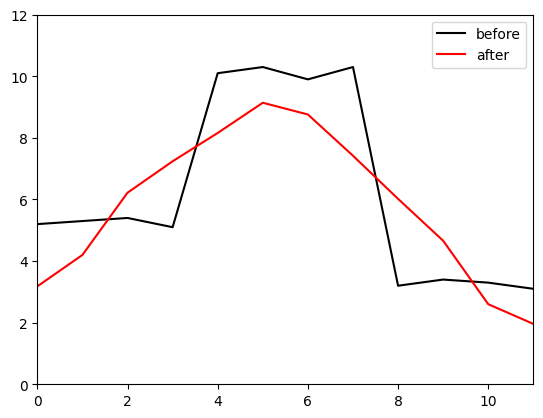

In [23]:
omega2 = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
h4 = conv_5_1_1_zp(x, omega2)
# Check that you have computed this correctly
print(f"Sum of output is {np.sum(h4):3.3}, should be 69.6")
# Draw the signal
fig,ax = plt.subplots()
ax.plot(x, 'k-',label='before')
ax.plot(h4, 'r-',label='after')
ax.set_xlim(0,11)
ax.set_ylim(0, 12)
ax.legend()
plt.show()

In [ ]:
"""
TODO :
수학적으로 (f*g)*h와 f*(g*h)는 동일하다
따라서 함수 f에 Filter g와 h를 순서대로 컨볼루션 하는 것은
g와 h를 컨볼루션 한 후 f에 한번만 컨볼루션 하는 것과 완전히 동일하다.

따라서 컨볼루션 두 번은 가중치 행렬의 컨볼루션에 의해
한 번의 컨볼루션으로 대체할 수 있다.
"""

In [30]:
# Finally let's define a zero-padded convolution operation
# with a convolution kernel size of 3, a stride of 1, and a dilation of 2
# as in figure 10.3d. Write it yourself, don't call a library routine!
# Don't forget that Python arrays are indexed from zero, not from 1 as in the book figures
def conv_3_1_2_zp(x_in, omega):
  x_out = np.zeros_like(x_in)
  # TODO -- write this function # replace this line
  kernel_size = 3
  stride = 1
  dilation = 2
  """보통 Zero-Padding Size는 (Kernel size-1)/2로 한다고 했죠?"""
  pad_width = ((kernel_size - 1)*dilation) // 2  # Padding on one side for zero padding

  # Pad the input array
  """
  np.pad를 이용하면 Zero padding을 쉽게 이용할 수 있습니다.

  Parameters are :
  (input matrix, Padding size, mode='constant', constant_values=0).
  Output of np.pad = Padded Matrix.
  """
  x_padded = np.pad(x_in, pad_width, mode='constant', constant_values=0)

  # Calculate output dimensions
  """
  Activation Map의 Dimension도 결정합니다.
  Padding에 의해 Input matrix의 Spatial Dimension이 보존됩니다.
  """
  h_out = len(x_in)
  x_out = np.zeros_like(x_in)

  # 컨볼루션 연산 수행
  for i in range(h_out): # Starting Point
      for j in range(kernel_size):
          index = i + j * dilation  # Dilation 적용
          if index < len(x_padded):  # x_padded 범위를 벗어나지 않도록 체크
              x_out[i] += x_padded[index] * omega[j]

  x_out = x_out
  return x_out

Sum of output is 68.3, should be 68.3


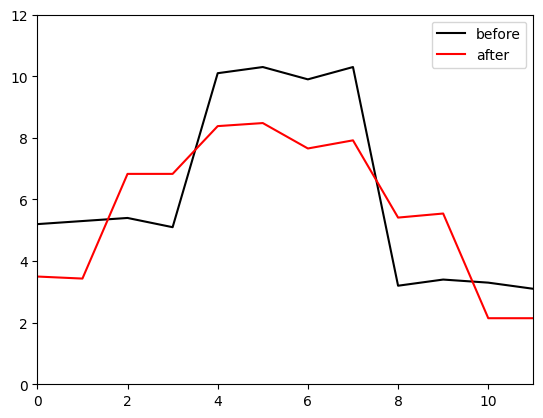

In [31]:
omega = [0.33,0.33,0.33]
h5 = conv_3_1_2_zp(x, omega)
# Check that you have computed this correctly
print(f"Sum of output is {np.sum(h5):3.3}, should be 68.3")
# Draw the signal
fig,ax = plt.subplots()
ax.plot(x, 'k-',label='before')
ax.plot(h5, 'r-',label='after')
ax.set_xlim(0,11)
ax.set_ylim(0, 12)
ax.legend()
plt.show()